This is the KERAS CNN implementation for the MALARIA CELL IMAGES DATASET

Breakdown of this notebook:

Loading the dataset: Load the data and import the libraries.

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import cv2
from PIL import Image
# For CNN model creation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
SIZE = 64

In [2]:
!dir
os.path.isdir('C:\\Users\\nchu2\\AppData\\Roaming\\SPB_Data\\EE496\\cell_images\\cell_images\\Parasitized')

 Volume in drive C is OS
 Volume Serial Number is 4E4C-470D

 Directory of C:\Users\nchu2\AppData\Roaming\SPB_Data\EE496

04/12/2020  11:23 PM    <DIR>          .
04/12/2020  11:23 PM    <DIR>          ..
04/07/2020  06:54 PM    <DIR>          .ipynb_checkpoints
04/07/2020  06:55 PM    <DIR>          cell_images
03/25/2020  07:59 PM             3,258 cnn_test.py
04/12/2020  11:23 PM           113,045 EE496_Malaria_Deteection.ipynb
               2 File(s)        116,303 bytes
               4 Dir(s)  12,603,248,640 bytes free


True

In [3]:
infected = os.listdir('C:\\Users\\nchu2\\AppData\\Roaming\\SPB_Data\\EE496\\cell_images\\cell_images\\Parasitized') 
uninfected = os.listdir('C:\\Users\\nchu2\\AppData\\Roaming\\SPB_Data\\EE496\\cell_images\\cell_images\\Uninfected')

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("C:\\Users\\nchu2\\AppData\\Roaming\\SPB_Data\\EE496\\cell_images\\cell_images\\Parasitized\\"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("C:\\Users\\nchu2\\AppData\\Roaming\\SPB_Data\\EE496\\cell_images\\cell_images\\Uninfected\\"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

labels = np.array(labels)

In [5]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
  x_train, x_test = train_test_split(data, test_size=0.2, random_state=1,shuffle = True)
  y_train, y_test = train_test_split(labels, test_size=0.2, random_state=1)
  print(np.array(x_train).shape)

(22046, 64, 64, 3)


In [7]:
regulization_list = [0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10]
#regulization_list = np.logspace(-10,1,32)
#regulization_list = np.insert(regulization_list, 0, 0)

# probability axis values 
prob = []
# loss axis values 
loss = []
history = []
for i in regulization_list:
    classifier = tf.keras.Sequential()
    classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Flatten())
    #classifier.add(Dense(activation = 'relu', units=512))
    #classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dense(activation = 'relu', units=256))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dense(kernel_regularizer=l1(i), activation = 'sigmoid', units=2))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())

    history.append(classifier.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 30, 
                         validation_split = 0.1,
                         shuffle = False))

    print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(x_test), np.array(y_test))[1]*100))
    loss.append(classifier.evaluate(np.array(x_test), np.array(y_test)))
    print(classifier.evaluate(np.array(x_test), np.array(y_test)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

Epoch 13/30
19841/19841 - 3s - loss: 0.0188 - accuracy: 0.9903 - val_loss: 0.2624 - val_accuracy: 0.9488
Epoch 14/30
19841/19841 - 4s - loss: 0.0147 - accuracy: 0.9920 - val_loss: 0.2593 - val_accuracy: 0.9438
Epoch 15/30
19841/19841 - 4s - loss: 0.0100 - accuracy: 0.9941 - val_loss: 0.2948 - val_accuracy: 0.9492
Epoch 16/30
19841/19841 - 4s - loss: 0.0133 - accuracy: 0.9926 - val_loss: 0.9008 - val_accuracy: 0.7642
Epoch 17/30
19841/19841 - 4s - loss: 0.0233 - accuracy: 0.9888 - val_loss: 0.5478 - val_accuracy: 0.8508
Epoch 18/30
19841/19841 - 4s - loss: 0.0178 - accuracy: 0.9914 - val_loss: 0.2716 - val_accuracy: 0.9492
Epoch 19/30
19841/19841 - 4s - loss: 0.0103 - accuracy: 0.9946 - val_loss: 0.4095 - val_accuracy: 0.8980
Epoch 20/30
19841/19841 - 4s - loss: 0.0066 - accuracy: 0.9954 - val_loss: 0.2422 - val_accuracy: 0.9551
Epoch 21/30
19841/19841 - 4s - loss: 0.0045 - accuracy: 0.9963 - val_loss: 0.2647 - val_accuracy: 0.9533
Epoch 22/30
19841/19841 - 4s - loss: 0.0032 - accuracy:

Train on 19841 samples, validate on 2205 samples
Epoch 1/30
19841/19841 - 4s - loss: 0.4153 - accuracy: 0.8182 - val_loss: 0.6431 - val_accuracy: 0.7932
Epoch 2/30
19841/19841 - 4s - loss: 0.1881 - accuracy: 0.9251 - val_loss: 0.3486 - val_accuracy: 0.9002
Epoch 3/30
19841/19841 - 4s - loss: 0.1393 - accuracy: 0.9446 - val_loss: 2.1103 - val_accuracy: 0.5605
Epoch 4/30
19841/19841 - 4s - loss: 0.1160 - accuracy: 0.9521 - val_loss: 0.2378 - val_accuracy: 0.9156
Epoch 5/30
19841/19841 - 4s - loss: 0.0892 - accuracy: 0.9630 - val_loss: 0.2686 - val_accuracy: 0.9274
Epoch 6/30
19841/19841 - 4s - loss: 0.0608 - accuracy: 0.9728 - val_loss: 4.5085 - val_accuracy: 0.5025
Epoch 7/30
19841/19841 - 3s - loss: 0.0465 - accuracy: 0.9788 - val_loss: 0.9193 - val_accuracy: 0.8100
Epoch 8/30
19841/19841 - 3s - loss: 0.0404 - accuracy: 0.9815 - val_loss: 0.2216 - val_accuracy: 0.9442
Epoch 9/30
19841/19841 - 4s - loss: 0.0360 - accuracy: 0.9829 - val_loss: 0.2080 - val_accuracy: 0.9451
Epoch 10/30
198

Epoch 29/30
19841/19841 - 4s - loss: 0.0038 - accuracy: 0.9964 - val_loss: 0.2845 - val_accuracy: 0.9488
Epoch 30/30
19841/19841 - 4s - loss: 0.0038 - accuracy: 0.9963 - val_loss: 0.2741 - val_accuracy: 0.9510
5512/5512 [==============================] - 1s 107us/sample - loss: 0.3641 - accuracy: 0.9434
Test_Accuracy: 94.34%
5512/5512 [==============================] - 1s 102us/sample - loss: 0.3641 - accuracy: 0.9434
[0.36406818511233924, 0.9433962]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 31, 31, 32)        128       
_____________________________________________________________

Epoch 8/30
19841/19841 - 4s - loss: 0.0507 - accuracy: 0.9770 - val_loss: 0.1941 - val_accuracy: 0.9433
Epoch 9/30
19841/19841 - 4s - loss: 0.0399 - accuracy: 0.9805 - val_loss: 0.4181 - val_accuracy: 0.9184
Epoch 10/30
19841/19841 - 4s - loss: 0.0427 - accuracy: 0.9815 - val_loss: 0.5141 - val_accuracy: 0.9125
Epoch 11/30
19841/19841 - 3s - loss: 0.0369 - accuracy: 0.9823 - val_loss: 2.2479 - val_accuracy: 0.5465
Epoch 12/30
19841/19841 - 4s - loss: 0.0303 - accuracy: 0.9860 - val_loss: 0.2049 - val_accuracy: 0.9420
Epoch 13/30
19841/19841 - 4s - loss: 0.0211 - accuracy: 0.9898 - val_loss: 0.2453 - val_accuracy: 0.9469
Epoch 14/30
19841/19841 - 4s - loss: 0.0144 - accuracy: 0.9921 - val_loss: 0.2768 - val_accuracy: 0.9433
Epoch 15/30
19841/19841 - 4s - loss: 0.0107 - accuracy: 0.9932 - val_loss: 0.2846 - val_accuracy: 0.9456
Epoch 16/30
19841/19841 - 4s - loss: 0.0086 - accuracy: 0.9945 - val_loss: 0.2580 - val_accuracy: 0.9506
Epoch 17/30
19841/19841 - 4s - loss: 0.0088 - accuracy: 0

Train on 19841 samples, validate on 2205 samples
Epoch 1/30
19841/19841 - 4s - loss: 0.4035 - accuracy: 0.8461 - val_loss: 0.3163 - val_accuracy: 0.8993
Epoch 2/30
19841/19841 - 3s - loss: 0.2047 - accuracy: 0.9344 - val_loss: 0.3703 - val_accuracy: 0.8707
Epoch 3/30
19841/19841 - 4s - loss: 0.1684 - accuracy: 0.9455 - val_loss: 0.2436 - val_accuracy: 0.9184
Epoch 4/30
19841/19841 - 3s - loss: 0.1394 - accuracy: 0.9544 - val_loss: 0.6995 - val_accuracy: 0.8567
Epoch 5/30
19841/19841 - 4s - loss: 0.1120 - accuracy: 0.9640 - val_loss: 1.9649 - val_accuracy: 0.5084
Epoch 6/30
19841/19841 - 4s - loss: 0.0981 - accuracy: 0.9692 - val_loss: 0.3409 - val_accuracy: 0.9134
Epoch 7/30
19841/19841 - 4s - loss: 0.0837 - accuracy: 0.9757 - val_loss: 2.2550 - val_accuracy: 0.5211
Epoch 8/30
19841/19841 - 4s - loss: 0.0682 - accuracy: 0.9822 - val_loss: 0.2424 - val_accuracy: 0.9370
Epoch 9/30
19841/19841 - 4s - loss: 0.0552 - accuracy: 0.9873 - val_loss: 0.2020 - val_accuracy: 0.9392
Epoch 10/30
198

Epoch 29/30
19841/19841 - 4s - loss: 0.0304 - accuracy: 0.9978 - val_loss: 0.1953 - val_accuracy: 0.9524
Epoch 30/30
19841/19841 - 3s - loss: 0.0297 - accuracy: 0.9978 - val_loss: 0.2015 - val_accuracy: 0.9429
5512/5512 [==============================] - 1s 103us/sample - loss: 0.2422 - accuracy: 0.9387
Test_Accuracy: 93.87%
5512/5512 [==============================] - 1s 103us/sample - loss: 0.2422 - accuracy: 0.9387
[0.2422196209019777, 0.9386792]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 31, 31, 32)        128       
_____________________________________________________________

Epoch 8/30
19841/19841 - 4s - loss: 0.7566 - accuracy: 0.7227 - val_loss: 0.7559 - val_accuracy: 0.5152
Epoch 9/30
19841/19841 - 3s - loss: 0.7559 - accuracy: 0.7679 - val_loss: 0.7543 - val_accuracy: 0.5057
Epoch 10/30
19841/19841 - 3s - loss: 0.7563 - accuracy: 0.8045 - val_loss: 0.7572 - val_accuracy: 0.5279
Epoch 11/30
19841/19841 - 4s - loss: 0.7565 - accuracy: 0.8497 - val_loss: 0.7536 - val_accuracy: 0.5846
Epoch 12/30
19841/19841 - 3s - loss: 0.7562 - accuracy: 0.8758 - val_loss: 0.7563 - val_accuracy: 0.5306
Epoch 13/30
19841/19841 - 4s - loss: 0.7552 - accuracy: 0.9030 - val_loss: 0.7511 - val_accuracy: 0.8680
Epoch 14/30
19841/19841 - 4s - loss: 0.7550 - accuracy: 0.9332 - val_loss: 0.7751 - val_accuracy: 0.5342
Epoch 15/30
19841/19841 - 4s - loss: 0.7341 - accuracy: 0.9433 - val_loss: 0.7317 - val_accuracy: 0.8621
Epoch 16/30
19841/19841 - 4s - loss: 0.6782 - accuracy: 0.9523 - val_loss: 0.6419 - val_accuracy: 0.9297
Epoch 17/30
19841/19841 - 3s - loss: 0.6334 - accuracy: 0

In [8]:
print(loss)
print(regulization_list)
loss1 = []
accu = []
val_loss = []
val_accu = []
for i in loss:
    loss1.append(i[0])
    accu.append(i[1])
for k in history:
    val_accu.append(k.history['val_accuracy'][29])
    val_loss.append(k.history['val_loss'][29])

[[0.3887140781563362, 0.94666183], [0.22918119210160523, 0.93214804], [1.4684338590403254, 0.6939405], [0.3771569175825686, 0.9495646], [0.36406818511233924, 0.9433962], [0.29704689821268937, 0.94938314], [0.37338857650986623, 0.94992745], [0.2754303695463693, 0.9488389], [0.22803371169851722, 0.94920176], [0.2422196209019777, 0.9386792], [0.25270723701821013, 0.9481132], [0.49362562676818694, 0.9457547], [1.2236651066252733, 0.48349056]]
[0, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]


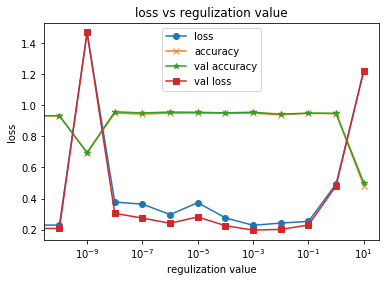

In [9]:
plt.semilogx(regulization_list, loss1,'o-',label='loss')
plt.semilogx(regulization_list, accu,'x-',label='accuracy')
plt.semilogx(regulization_list, val_accu,'*-',label='val accuracy')
plt.semilogx(regulization_list, val_loss,'s-',label='val loss')
plt.title('loss vs regulization value')
plt.xlabel('regulization value')
plt.ylabel('loss')
plt.legend()

In [10]:
print(history[1].history['val_loss'][29])

0.20742576567629298
